# "a" consistency

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [18]:
import bz2
import os
import ujson
import attr

import pandas as pd
import numpy as np
import statsmodels.api as sm

from glob import glob
from collections import Counter, UserDict
from itertools import islice
from tqdm import tqdm

In [20]:
pd.options.display.max_rows = 500

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [4]:
ds = Dataset('../../data/top200-100b.json/')

In [6]:
def lin_reg(counts):
    x = np.arange(len(counts))
    x = sm.add_constant(x)
    reg = sm.OLS(counts, x)
    return reg, reg.fit()

In [13]:
rows = []
for n in ds.novels():
    
    if n['word_count'] < 50000 or not min(n['counts']['a']):
        continue
        
    counts = np.array(n['counts']['a'])
    counts = counts / counts.sum()
    
    reg, fit = lin_reg(counts)
    
    rows.append((n['title'], n.get('author_last'), n['pub_year'], fit.params[1], fit.pvalues[1]))

100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


In [14]:
fits = pd.DataFrame(rows, columns=('title', 'author', 'pub_year', 'coef', 'p'))

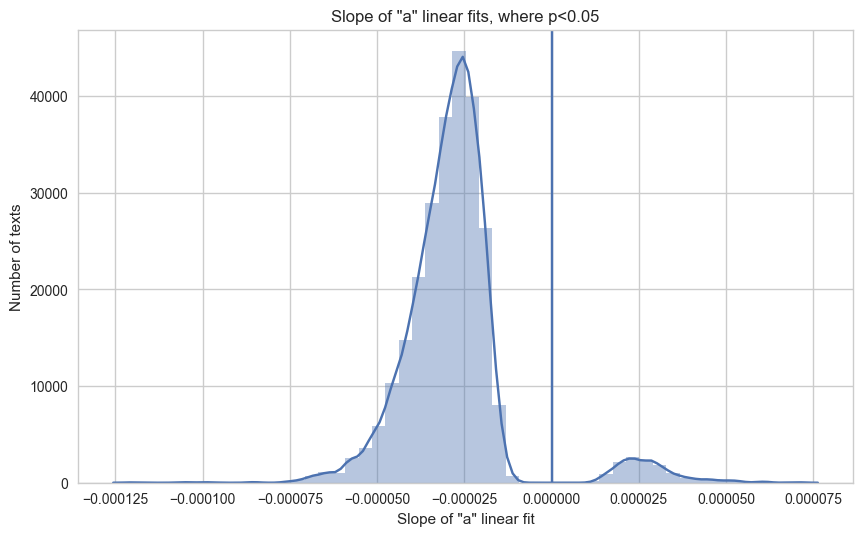

In [15]:
plt.figure(figsize=(10,6), dpi=100)
sns.distplot(fits[fits.p<0.05].coef)
plt.title('Slope of "a" linear fits, where p<0.05')
plt.xlabel('Slope of "a" linear fit')
plt.ylabel('Number of texts')
plt.axvline(x=0)

In [22]:
fits[fits.pub_year>1900].sort_values('coef', ascending=False)

,title,author,pub_year,coef,p
12944,Recreations of a Psychologist: By G. Stanley Hall,Hall,1920,0.000071,4.607767e-08
18999,Mysterious Miss Dacres: Mrs. Schuyler Crownins...,Crowninshield,1901,0.000069,2.435541e-06
12283,The sound and the fury,Faulkner,1929,0.000062,7.513450e-05
12515,The Girl and the Game: And Other College Stori...,Williams,1908,0.000052,5.242156e-06
15891,Sir Walter of Kent: A Truthful History of Thre...,Lewis,1902,0.000049,5.076428e-05
11156,The Seventh Person: By Benjamin Brace,Brace,1906,0.000049,1.946565e-06
19377,"Gilbert, or, Then and Now: A Thrilling Story o...",Underwood,1903,0.000045,8.062398e-04
10588,Ham on rye,Bukowski,1982,0.000045,3.743541e-05
396,Men: women and boats,Crane,1921,0.000044,3.107850e-05
6195,The Kidder: And Other Tales: By John Bach McMa...,McMaster,1915,0.000043,3.612447e-04
